In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# ### Analysis Project 
# 
# ### 2022-11-2

# ### Statistical significance tests on movie ratings data
                    
# We acknowledge any outcome could be due to
# chance. Our only question is how likely that is by chance. If it is
# implausibly unlikely, we reject the assumption that it was just due to
# chance. And either the null hypothesis is true or not, so if we reject it
# is plausible, it probably means that our treatment did have an effect.                  
                    
#%% Before we do the stats, let's talk about the psychology of movie ratings:
    
# Hypothesis 1: There is no difference in the distribution of ratings between the two movies.

# Hypothesis 2: Distribution of ratings for one of the movies will be different from the other.

# Make sure that you actually have 2 plausible outcomes before doing the
# study. If the outcome is a foregone conclusion, it's not science. Science
# is about being open to any possible outcome.

# Null hypothesis: There is no difference. 

# Let's implement the canonical data analysis cascade



# b. Load/import - libraries/packages:

import pandas as pd
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
import seaborn as sns


# Let me walk you through the null hypothesistesting framework at least once (just once). It is a bit arcane. It madesense to Fisher.         

### 1) Start with a hypothesis (something about the world you would wish toknow, whether it is true or not). 

### 2) State a null hypothesis and assume that it is 100% true (that there is no difference in the conditions of 1), e.g. here Matrix I rated the sameas Matrix II and III). This is essential to NHST. 

### 3) This is - at the face of it - an odd thing to do, because naively you would think that scientists look for probability (Hypothesis | Data) But that is unknowable. Which is why we do the study in the first place. What is calculable: Probability (Data | NULL hypothesis)You can assess the probability of the data given the null hypothesis

### 4) To get this probability, we represent the sample by a parameter like a sample mean, then transform the sample mean into a test statistic with a known distribution.

### 5) The area under the curve of the distribution of the test statistic in the tail (or tails, if it is a 2-tailed test) is the p value, in otherwords the probability of this result (or a more extreme one) given chancealone.

### 6) We compare the p value to a significance level alpha (typically 5% or 1%)

### 7) Decision point (Choice)
### a) If it is smaller than that, we decide to reject our assumption that the null hypothesis is true.
### b) If it is not smaller than that, we don't do anything because we alreadyassumed that the null hypothesis is true.                    

## 1. Loader / Transducer: Taking the inputs from their native form and putting it into something Python can use: a matrix

In [2]:
M = pd.read_csv('movieReplicationSet.csv')

M.columns[1] # wing commander, we need to index at 0
M.columns[399] # Look Whos Talking, the final movie col
max_index = 399


u_stats = []
p_values = []

ks_pvalues = []

for x in range(400):
# for x in range(210):
# for x in range(1):
    
    title = M.columns[x]
    
#     if title == 'Black Hawk Down (2001)':
#         continue
    
    print(title)

    Female = M.loc[M['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1, title]
    Male = M.loc[M['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2, title]

#     Female = M.loc[M['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1, 'Black Hawk Down (2001)']
#     Male = M.loc[M['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2, 'Black Hawk Down (2001)']

    
#     print(Female)
#     print(Male)

    Female = pd.to_numeric(Female, errors='coerce').values
    Male = pd.to_numeric(Male, errors='coerce').values
    
#     M1 = np.array(Female)
#     M2 = np.array(Male)
    
    
#     print("1: len female : %s , len male: %s" % (len(M1), len(M2)))

    
    # remove element-wise
    M1 = Female[np.isfinite(Female)]
    M_1 = M1[~np.isnan(M1)]
    
    M2 = Male[np.isfinite(Male)]
    M_2 = M2[~np.isnan(M2)]
    
        
#     print("2: len female : %s , len male: %s" % (len(M_1), len(M_2)))
    
    
    combinedData = np.transpose(np.array([M_1,M_2], dtype=object)) # array of arrays
    
    print(combinedData)
    
#     print(combinedData[0]).dtype
#     print(combinedData[1]).dtype

    
#     print(np.unique(combinedData[0]))
#     print(np.unique(combinedData[1]))
    
    u1,p1 = stats.mannwhitneyu(combinedData[0].astype(float),combinedData[1].astype(float))
    
    
    u_stats.append(u1)
    p_values.append(p1)
    
    ks_stat, ks_p = stats.ks_2samp(combinedData[0],combinedData[1])
    ks_pvalues.append(ks_p)
    


The Life of David Gale (2003)
[array([3. , 3.5, 1.5, 2.5, 1.5, 4. , 1. , 1. , 3.5, 0.5, 3. , 2. , 1. ,
        0.5, 4. , 4. , 4. , 3.5, 3. , 3.5, 3. , 2. , 2. , 3. , 0.5, 3. ,
        2. , 4. , 2.5, 1.5, 0.5, 3. , 2.5, 0. , 3.5, 1.5, 0.5, 2.5, 3. ,
        2. , 2. , 1. , 3. , 1. , 3.5, 2.5, 3. ])
 array([2.5, 2.5, 3.5, 2. , 1. , 0.5, 3. , 3.5, 0. , 0. , 0.5, 0.5, 1. ,
        1.5, 3. , 0. , 2.5, 1.5, 1.5, 2.5, 4. , 3. , 1.5, 2. , 3. ])    ]
Wing Commander (1999)
[array([1.5, 2. , 3. , 2. , 4. , 1. , 3. , 4. , 4. , 2.5, 3. , 2. , 3. ,
        3. , 3. , 2. , 2.5, 1. , 1. , 0.5, 2. , 1. , 2. , 2.5, 2. , 2.5,
        2.5, 2. , 2. , 0.5, 2. , 2. , 3.5, 0. , 2. , 2.5, 3. , 0. , 3. ,
        3. , 2. , 4. ])
 array([3. , 3.5, 4. , 2. , 0.5, 0.5, 0. , 0. , 1.5, 3.5, 0. , 0. , 2.5,
        0. , 1. , 2. , 1. , 1. , 3.5, 2. , 2. , 0.5, 2. , 1. , 3. , 3. ,
        2.5])                                                           ]
Django Unchained (2012)
[array([4. , 1.5, 2. , 3.5, 3.5, 4. , 4. , 4. 

Godzilla (1998)
[array([1. , 2. , 3. , 4. , 2.5, 2. , 4. , 1.5, 2. , 3.5, 1.5, 2.5, 2. ,
        1.5, 0.5, 3.5, 3. , 2. , 2. , 2.5, 3.5, 1. , 4. , 2.5, 1. , 2. ,
        2. , 3. , 2. , 2. , 2. , 2.5, 2.5, 2.5, 1. , 3.5, 3. , 3. , 3.5,
        3. , 1.5, 3. , 2. , 2.5, 3. , 2. , 1.5, 3. , 3. , 3. , 2. , 0. ,
        3. , 2.5, 0.5, 3. , 1.5, 2.5, 1.5, 0. , 2.5, 0.5, 2.5, 2. , 2.5,
        2.5, 3.5, 2. , 4. , 3.5, 3.5, 0.5, 3. , 1. , 3. , 2.5, 1. , 0. ,
        2.5, 3. , 3.5, 2.5, 2. , 2. , 0.5, 2.5, 3. , 2. , 2.5, 2. , 2. ,
        2.5, 1. , 2. , 2.5, 4. , 3. , 1.5, 2. , 3. , 1.5, 3.5, 4. , 4. ,
        0. , 3. , 2. , 2. , 2. , 1. , 2.5, 1. , 3. , 1. , 3.5, 2.5, 4. ,
        3. , 2.5, 1. , 2. , 3. , 3.5, 0.5, 2.5, 1. , 2.5, 3. , 4. , 2.5,
        2.5, 1.5, 3. , 2.5, 3.5, 2. , 2.5, 3.5, 3. , 0.5, 2.5, 2.5, 2. ,
        2.5, 1.5, 2. , 2. , 2.5, 2.5, 3. , 2.5, 2.5, 3. , 2.5, 3.5, 3.5,
        2. , 1. , 4. , 1. , 2. , 1. , 2. , 2.5, 2.5, 3. , 4. , 3. , 2.5,
        0. , 3. , 4. , 1.5, 1.5, 1.

Father's Day (1997)
[array([1.5, 1.5, 2. , 2.5, 2.5, 3.5, 3.5, 2. , 4. , 3. , 4. , 2.5, 2. ,
        3. , 2.5, 3. , 2.5, 3.5, 3.5, 3. , 3.5, 0.5, 2. , 3.5, 0.5, 1.5,
        3. , 3.5, 0. , 0. , 2. , 3. , 1.5, 2.5, 2. , 2. , 1. , 1. , 3. ,
        3.5, 0. , 0.5, 0.5, 3. , 1.5, 3.5, 3.5, 1.5, 4. ])
 array([3.5, 2. , 3.5, 2. , 0.5, 1. , 2. , 3. , 0. , 2.5, 1.5, 0. , 2. ,
        0. , 4. , 1.5, 2. , 1. , 2. , 3.5, 1.5])                        ]
Batman (1989)
[array([1. , 2.5, 0. , 2.5, 1.5, 4. , 4. , 2.5, 3.5, 4. , 2.5, 3.5, 2.5,
        2.5, 3.5, 1. , 4. , 1.5, 3.5, 3. , 1.5, 3. , 3. , 1. , 3.5, 2. ,
        2. , 3.5, 0. , 4. , 4. , 3. , 2.5, 2.5, 4. , 3.5, 3. , 4. , 3. ,
        1.5, 3.5, 1.5, 2.5, 3. , 2.5, 3. , 2.5, 2.5, 3. , 3. , 3.5, 3.5,
        3. , 3.5, 2.5, 4. , 3.5, 3. , 2. , 3.5, 4. , 4. , 2. , 3. , 3.5,
        2.5, 4. , 3. , 3.5, 2. , 3.5, 3.5, 1. , 2.5, 3. , 3.5, 4. , 2.5,
        3. , 1.5, 3. , 3. , 2. , 4. , 3.5, 3. , 3. , 4. , 3. , 2. , 4. ,
        2.5, 3.5, 4. , 3. , 3.

Toy Story (1995)
[array([4. , 3. , 3. , 2.5, 3. , 2. , 1.5, 4. , 2.5, 4. , 2. , 4. , 3. ,
        0. , 4. , 1.5, 2.5, 4. , 2.5, 3. , 4. , 2.5, 4. , 4. , 3. , 2.5,
        4. , 0. , 2. , 2.5, 4. , 4. , 4. , 4. , 3. , 4. , 2. , 3.5, 4. ,
        4. , 1. , 1.5, 3. , 3.5, 1. , 2.5, 4. , 4. , 3.5, 4. , 3. , 3.5,
        3.5, 4. , 3.5, 4. , 3.5, 3. , 3. , 3.5, 4. , 4. , 3.5, 3. , 4. ,
        3.5, 3. , 4. , 4. , 3.5, 3.5, 4. , 2.5, 3. , 1.5, 3.5, 3. , 2.5,
        3.5, 4. , 3.5, 2. , 4. , 3.5, 4. , 3.5, 2.5, 4. , 4. , 4. , 3. ,
        4. , 4. , 4. , 3. , 3.5, 2.5, 4. , 3. , 3.5, 4. , 2.5, 4. , 4. ,
        3. , 1. , 4. , 4. , 1. , 4. , 3.5, 3. , 3.5, 3.5, 3. , 2.5, 4. ,
        4. , 4. , 4. , 3.5, 4. , 4. , 3. , 3. , 3. , 4. , 2.5, 3. , 4. ,
        4. , 1. , 4. , 3. , 3. , 3.5, 4. , 0. , 4. , 2.5, 2.5, 3.5, 0.5,
        4. , 4. , 4. , 3. , 1.5, 3.5, 3.5, 3.5, 4. , 4. , 4. , 3.5, 3. ,
        2.5, 3.5, 2. , 4. , 3.5, 3. , 4. , 4. , 2. , 1.5, 3.5, 3.5, 2.5,
        4. , 3.5, 4. , 4. , 4. , 3

Gladiator (2000)
[array([3.5, 3.5, 1.5, 2. , 4. , 0.5, 3. , 3. , 4. , 3. , 2. , 3. , 2.5,
        1. , 4. , 1. , 3.5, 1.5, 2. , 4. , 2. , 3. , 4. , 1. , 3. , 4. ,
        3. , 2. , 4. , 3.5, 3. , 3.5, 3. , 1.5, 4. , 4. , 3.5, 2. , 2. ,
        2. , 1. , 4. , 3.5, 4. , 3.5, 4. , 2.5, 1.5, 2. , 3.5, 3. , 4. ,
        2. , 3. , 2.5, 2.5, 0.5, 4. , 3.5, 0.5, 3.5, 1. , 1.5, 3. , 3. ,
        3. , 3.5, 3. , 4. , 2. , 2. , 3. , 3.5, 3.5, 3.5, 4. , 2.5, 1.5,
        0.5, 4. , 4. , 4. , 3.5, 4. , 3. , 2. , 3. , 1.5, 2. , 4. , 3. ,
        3. , 1.5, 3.5, 4. , 4. , 3. , 2. , 2.5, 4. , 4. , 0.5, 3.5, 2. ,
        1. , 2.5, 1.5, 3. , 4. , 2.5, 2. , 4. , 4. , 2.5, 2.5, 1.5, 2. ,
        3. , 2. , 4. , 2.5, 4. , 2. , 3. , 3. , 3. , 2. , 3. , 1.5, 3. ,
        2. , 3.5, 0.5, 1. , 4. , 1.5, 1. , 3. , 1. , 2.5, 3. , 1. , 3.5,
        3. , 2.5, 2.5, 2.5, 1.5, 1.5, 1.5, 4. , 4. , 1.5, 4. , 3.5, 3. ,
        2. , 3.5, 4. , 3. , 1.5, 3.5, 4. , 3.5, 2.5, 4. , 4. , 2.5, 4. ,
        2.5, 2.5, 4. , 2. , 3.5])


In [3]:
print(len(u_stats))

400


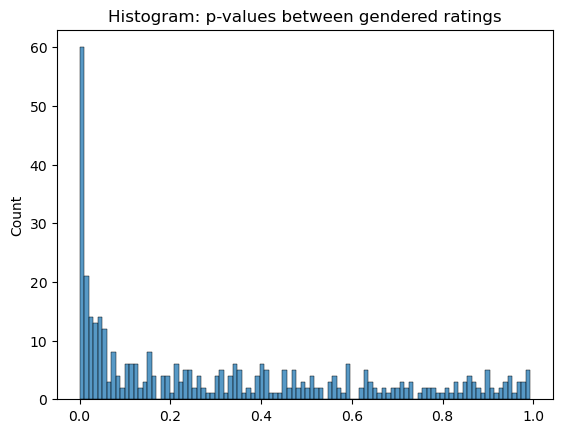

In [4]:
# now, plot the results


# sns.barplot(p_values)
bins=100
sns.histplot(p_values, bins=bins, label="Old")


plt.title('Histogram: p-values between gendered ratings')
# plt.xlabel('rating')
# plt.ylabel('count of rating')
# # plt.legend()
# # plt.ylim([0, 1])
plt.show()

In [5]:
# try to see what this data looks like in significance

alpha = 0.005

notsig = []
sig = []


for p in p_values:
    
    if p > alpha:
        notsig.append(p)
    elif p < alpha:
        sig.append(p)
    else:
        print("exact")

        
        
        
print("sizeof notsig: %s" % len(notsig))
print("sizeof sig: %s" % len(sig))

gendered_effect = float(len(sig) / len(notsig)) * 100
print("proportion of films exhibiting a gendered effect: %s" % gendered_effect)

sizeof notsig: 350
sizeof sig: 50
proportion of films exhibiting a gendered effect: 14.285714285714285


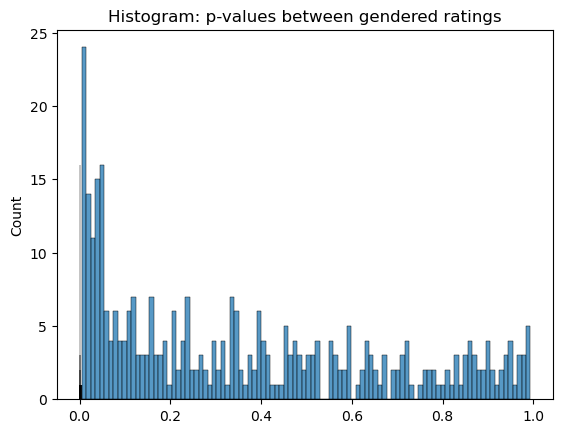

In [6]:
# now, plot the results


# sns.barplot(p_values)
bins=100
sns.histplot(sig, bins=bins, color="yellow", label="significant")
sns.histplot(notsig, bins=bins, label="not significant")

plt.title('Histogram: p-values between gendered ratings')
# plt.xlabel('rating')
# plt.ylabel('count of rating')
# # plt.legend()
# # plt.ylim([0, 1])
plt.show()

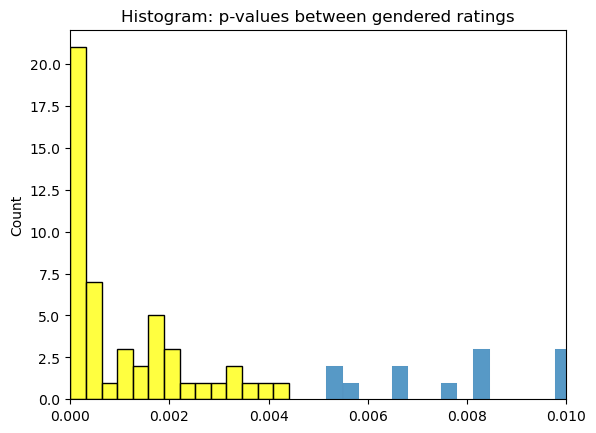

In [7]:
# now, plot the results which are significant vs insignificant


# sns.barplot(p_values)
bins=1000
sns.histplot(sig, bins=14, color="yellow", label="significant")
sns.histplot(notsig, bins=3000, label="not significant")



plt.title('Histogram: p-values between gendered ratings')
# plt.xlabel('rating')
# plt.ylabel('count of rating')
# # plt.legend()
# # plt.ylim([0, 1])

plt.xlim([0,0.01])
plt.show()

In [8]:
# now lets compare entire distributions



# ks_pvalues



# try to see what this data looks like in significance

alpha = 0.005

ks_notsig = []
ks_sig = []


for p in ks_pvalues:
    
    if p > alpha:
       ks_notsig.append(p)
    elif p < alpha:
        ks_sig.append(p)
    else:
        print("exact")

        
        
        
print("sizeof notsig: %s" % len(ks_notsig))
print("sizeof sig: %s" % len(ks_sig))

ks_gendered_effect = float(len(ks_sig) / len(ks_notsig)) * 100
print("proportion of films exhibiting a gendered effect: %s" % ks_gendered_effect)





sizeof notsig: 375
sizeof sig: 25
proportion of films exhibiting a gendered effect: 6.666666666666667
